In [3]:
import cartopy.io.img_tiles as cimgt

from matplotlib.transforms import offset_copy
import cartopy.feature as cf
import pandas as pd

from matplotlib import pyplot as plt
import cartopy.crs as ccrs

from cartopy.feature import NaturalEarthFeature
import numpy as np



In [18]:
df = pd.read_csv('data/training_All_v1.csv')
df.keys()

Index(['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'Latitude', 'Longitude', 'iso', 'Atacama', 'Arica',
       'La_Serena', 'Santiago', 'Maule', 'Norte', 'Sur', 'suelo', 'planta',
       'N', 'C'],
      dtype='object')

In [12]:
df_plant = df[df['planta']==1]
df_soil = df[df['suelo']==1]

In [48]:
lon_p = (df_plant['Longitude'])
lat_p =(df_plant['Latitude'])

In [60]:
lon_s = df_soil['Longitude']
lat_s =df_soil['Latitude']

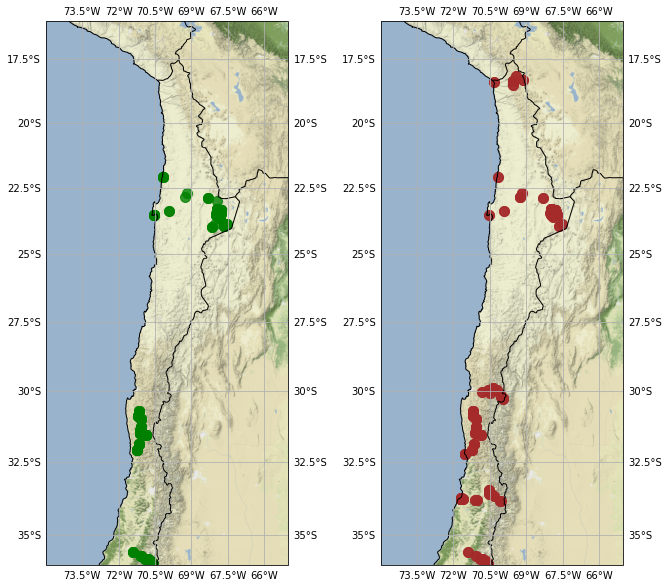

In [131]:
stamen_terrain = cimgt.Stamen('terrain-background')

fig, ax = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': stamen_terrain.crs},
                        figsize=(11,10))
ax = ax.flatten()

ax[0].set_extent([-65, -75, -36, -16])
ax[0].coastlines()
ax[0].add_image(stamen_terrain, 8)
ax[0].add_feature(cf.BORDERS)
#geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax[0])
#text_transform = offset_copy(ccrs.PlateCarree._as_mpl_transform(ax[0]), units='dots', x=-25)

ax[0].scatter(x=lon_p, y=lat_p,
            color='green',
            s=100,
            alpha=0.8,
            transform=ccrs.PlateCarree())


    
ax[0].gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)

ax[1].set_extent([-65, -75, -36, -16])
ax[1].add_image(stamen_terrain, 8)
ax[1].add_feature(cf.BORDERS)
ax[1].coastlines()

ax[1].scatter(x=lon_s, y=lat_s,
            color="brown",
            s=100,
            alpha=0.8,
            transform=ccrs.PlateCarree())

ax[1].gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)

plt.show()

# A

In [66]:
df_plant = pd.read_csv('data/plantasAll.csv')
df_soil = pd.read_csv('data/suelosAll.csv')

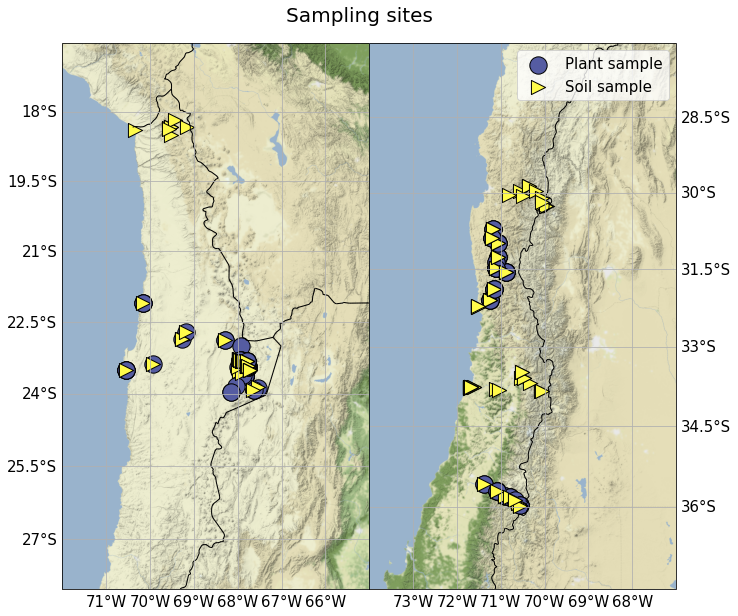

In [193]:
import lequi
import matplotlib 


stamen_terrain = cimgt.Stamen('terrain-background')
fig, ax = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': stamen_terrain.crs},
                        figsize=(11,10))
plt.rcParams.update({'font.size': 15})
plt.subplots_adjust(left=None, bottom=0, right=None, top=1.1, wspace=0, hspace=None)
fig.suptitle('Sampling sites', size=20)
ax = ax.flatten()

ax[0].set_extent([-65, -72, -28, -16.5])

gl = ax[0].gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
#ax[0].coastlines()
ax[0].add_image(stamen_terrain, 8)
ax[0].add_feature(cf.BORDERS)
ax[0].scatter(x=lequi.csv(df_plant['lon']) ,y=lequi.csv(df_plant['lat']),
            color='#555ca2',
            edgecolor='black',
            s=300,
            alpha=1,
            transform=ccrs.PlateCarree())
ax[0].scatter(x=lequi.csv(df_soil['lon']), y=lequi.csv(df_soil['lat']),
              marker = '>',
            color="#fffb4a",
            edgecolor='black',
            s=200,
            alpha=1,
            transform=ccrs.PlateCarree())    

gl.top_labels = False
gl.right_labels = False

#ax[1].set_extent([-65, -75, -36, -26])
#ax[1].set_extent([-67, -74, -36.1, -26.125])
ax[1].set_extent([-67, -74, -27, -37.5])
gl = ax[1].gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
ax[1].add_image(stamen_terrain, 8)
ax[1].add_feature(cf.BORDERS)
#ax[1].coastlines()
ax[1].scatter(x=lequi.csv(df_plant['lon']) ,y=lequi.csv(df_plant['lat']),
            color='#555ca2',
            edgecolor='black',
            s=300,
            alpha=1,
            transform=ccrs.PlateCarree(), label='Plant sample')
ax[1].scatter(x=lequi.csv(df_soil['lon']), y=lequi.csv(df_soil['lat']),
              marker = '>',
              edgecolor='black',
            color="#fffb4a",
            s=200,
            alpha=1,
            transform=ccrs.PlateCarree(), label='Soil sample')

gl.top_labels = False
#gl.right_labels = False
gl.left_labels = False
ax[1].legend()

plt.savefig('Samplis_sites.png', dpi=300)
plt.show()

# 